In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


%matplotlib inline

In [2]:
blog_df = pd.read_csv('blog_text.csv', index_col = 0)

In [3]:
linkedin_df = pd.read_csv('linkedin_with_text.csv', parse_dates = [6])

In [4]:
def clean_text(x):
    return x.replace("\\'", "'").replace('[', '').replace(']', '')

In [5]:
linkedin_df.body = linkedin_df.body.map(lambda x: clean_text(x))

In [68]:
linkedin_df = linkedin_df.groupby('title').max()

In [69]:
vect = CountVectorizer(decode_error = 'ignore', )
vec_df = pd.DataFrame()
for text, title in zip(linkedin_df.body, linkedin_df.index):
    vect.fit([text])
    row_vec = vect.transform([text])
    blog_row = pd.DataFrame(row_vec.toarray(), columns=vect.get_feature_names(), index = [title])
    vec_df = pd.concat([vec_df, blog_row])

In [70]:
for text, title in zip(blog_df.Blogs, blog_df.index):
    vect.fit([text])
    row_vec = vect.transform([text])
    blog_row = pd.DataFrame(row_vec.toarray(), columns=vect.get_feature_names(), index = [title])
    vec_df = pd.concat([vec_df, blog_row])

In [72]:
vec_df = vec_df.fillna(0)

In [73]:
pca = PCA(n_components= 2)
X = pca.fit_transform(vec_df)

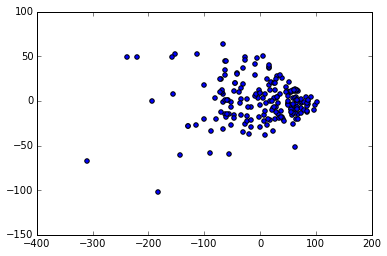

In [74]:
plt.scatter(X[:,0], X[:,1])

In [75]:
vec_df = vec_df.sort_index()

In [76]:
d = {}
for rowNo, row in vec_df.iterrows():
    sim_list = []
    for rowNo2, row2 in vec_df.iterrows():
        sim_list.append(cosine_similarity(row,row2)[0][0])
    d[rowNo] = sim_list

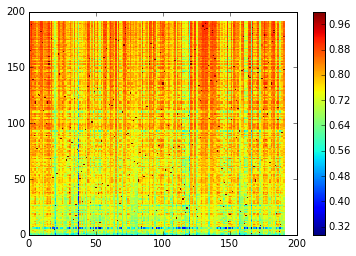

In [82]:
sim_df = pd.DataFrame(d)
sim_df = sim_df.sort(columns = sim_df.columns[0])
from pylab import pcolor, show, colorbar, xticks, yticks
pcolor(sim_df)
colorbar()
show()

In [83]:
sim_df = pd.DataFrame(d)

In [86]:
sim_df.index = sim_df.columns.tolist()

In [89]:
sim_df

,10 Life-Changing Decisions We Make Without...,10 Reasons To Stay At Your Job,10 Reasons You Have To Quit Your Job In 2014,10 Things Entrepreneurs Don’t Learn in College,10 Things I Learned From Richard Branson,10 Things I Learned While Interviewing Tony...,10 Things More Valuable Than Money,10 Things To Do When They Don't Call Back,10 Things You NEED to Do if You Were Hired Today,10 Unusual Ways to Release Oxytocin Into Your Life,...,the ten worst things you can do in a negotiation,the trillion dollar lies,the ultimate guide to changing your life,the ultimate guide to making a personal manifesto,the worst interview ever what i learned from it,what i learned about life after interviewing 80 highly successful people,what i learned from my first podcast guest in 1980 and what i learned from my last podcast guest yesterday,whats it like to lose 100000000 at facebook,who is in your scene,why i am never going to own a home again
10 Life-Changing Decisions We Make Without...,1.000000,0.878363,0.904948,0.857872,0.820449,0.834528,0.797931,0.841092,0.840491,0.897246,...,0.853134,0.884377,0.897001,0.781769,0.721403,0.828096,0.672657,0.695489,0.813415,0.861433
10 Reasons To Stay At Your Job,0.878363,1.000000,0.897455,0.848415,0.851282,0.832602,0.805657,0.817744,0.848106,0.865902,...,0.849266,0.866599,0.881762,0.779649,0.751441,0.849871,0.691033,0.736518,0.792383,0.845567
10 Reasons You Have To Quit Your Job In 2014,0.904948,0.897455,1.000000,0.866798,0.870173,0.866352,0.814497,0.875570,0.868756,0.903600,...,0.877084,0.894486,0.912694,0.810189,0.775625,0.879041,0.705653,0.753309,0.808996,0.876403
10 Things Entrepreneurs Don’t Learn in College,0.857872,0.848415,0.866798,1.000000,0.831637,0.838148,0.821148,0.815010,0.833131,0.856356,...,0.809936,0.842566,0.845605,0.805629,0.802654,0.864192,0.713606,0.784373,0.805792,0.842939
10 Things I Learned From Richard Branson,0.820449,0.851282,0.870173,0.831637,1.000000,0.887391,0.797551,0.820818,0.833030,0.836188,...,0.855965,0.831386,0.872172,0.774631,0.815889,0.868638,0.777165,0.770270,0.805899,0.810339
10 Things I Learned While Interviewing Tony...,0.834528,0.832602,0.866352,0.838148,0.887391,1.000000,0.793927,0.830144,0.839480,0.830994,...,0.873661,0.845284,0.883193,0.742410,0.854620,0.890429,0.789606,0.803227,0.805722,0.820346
10 Things More Valuable Than Money,0.797931,0.805657,0.814497,0.821148,0.797551,0.793927,1.000000,0.764079,0.772185,0.816283,...,0.786434,0.761385,0.802110,0.785716,0.723983,0.817564,0.685703,0.753697,0.772752,0.804106
10 Things To Do When They Don't Call Back,0.841092,0.817744,0.875570,0.815010,0.820818,0.830144,0.764079,1.000000,0.843461,0.838125,...,0.859253,0.832149,0.862204,0.734473,0.745177,0.838763,0.691389,0.744343,0.776612,0.805942
10 Things You NEED to Do if You Were Hired Today,0.840491,0.848106,0.868756,0.833131,0.833030,0.839480,0.772185,0.843461,1.000000,0.821053,...,0.859801,0.829285,0.876838,0.717563,0.766809,0.840607,0.711179,0.764081,0.800599,0.798550
10 Unusual Ways to Release Oxytocin Into Your Life,0.897246,0.865902,0.903600,0.856356,0.836188,0.830994,0.816283,0.838125,0.821053,1.000000,...,0.852795,0.880541,0.880745,0.823357,0.739007,0.835348,0.687829,0.724401,0.787318,0.870922
